In [41]:
from sklearn.datasets import make_moons

moons = make_moons(n_samples=5000, noise=0.3, random_state=10)

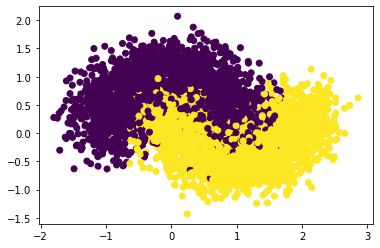

In [42]:
import matplotlib.pyplot as plt

x, y = moons[0], moons[1]
plt.scatter(x[:, 0], x[:, 1], c=y)

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [44]:
# Using different classifiers to have the democratic prediction
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

svm_clf = SVC(kernel="rbf", probability=True, random_state=10)
svm_clf.fit(x_train, y_train)

rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=10)
rnd_clf.fit(x_train, y_train)

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [45]:
print(svm_clf.score(x_test, y_test))
print(rnd_clf.score(x_test, y_test))
print(knn_clf.score(x_test, y_test))

0.895
0.88
0.891


In [46]:
from sklearn.ensemble import VotingClassifier

voting_clf_hard = VotingClassifier([
    ("svm_clf", svm_clf),
    ("rnd_clf", rnd_clf),
    ("knn_clf", knn_clf)
], voting="hard")

voting_clf_soft = VotingClassifier([
    ("svm_clf", svm_clf),
    ("rnd_clf", rnd_clf),
    ("knn_clf", knn_clf)
], voting="soft")

In [47]:
voting_clf_hard.fit(x_train, y_train)
voting_clf_soft.fit(x_train, y_train)

VotingClassifier(estimators=[('svm_clf',
                              SVC(probability=True, random_state=10)),
                             ('rnd_clf',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=10)),
                             ('knn_clf', KNeighborsClassifier())],
                 voting='soft')

In [48]:
print(voting_clf_hard.score(x_test, y_test))
print(voting_clf_soft.score(x_test, y_test))

0.892
0.895
